In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load data
beer_reviews = pd.read_csv("./beer_reviews.csv")

In [4]:
# Drop null row values
beer_reviews = beer_reviews.dropna()

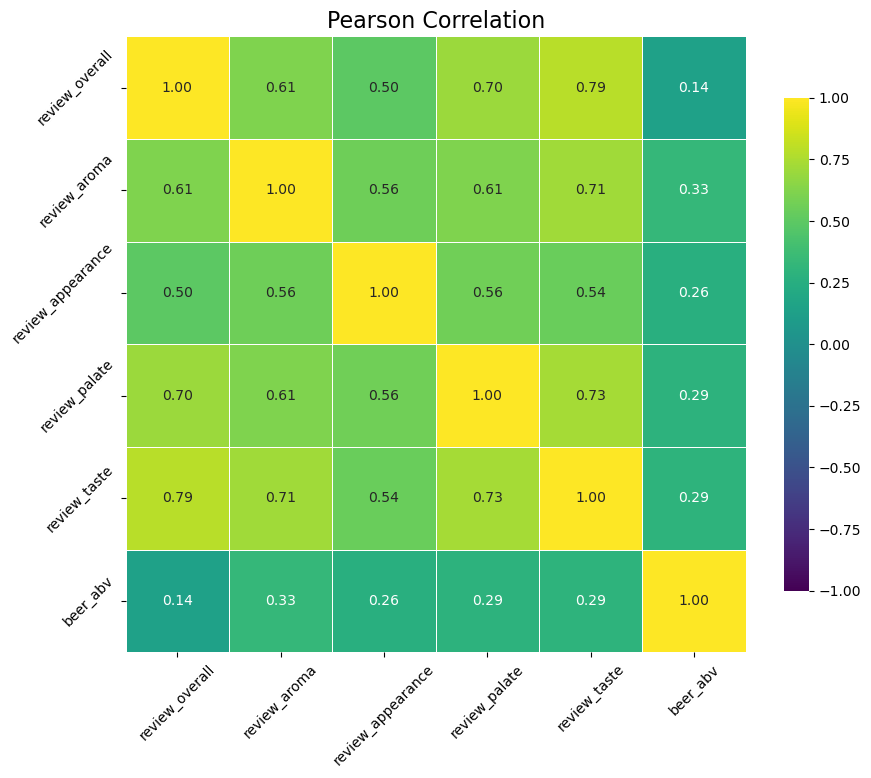

In [5]:
# Pearson correlation
corr_data = beer_reviews[['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']].corr()

# Create a heatmap with more visual enhancements
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(
    corr_data, 
    center=0, 
    vmin=-1, 
    vmax=1, 
    annot=True,  # Add annotations to the heatmap
    fmt=".2f",  # Format for the annotations
    cmap="viridis",  # A visually pleasing colormap
    linewidths=.5,  # Add lines between cells
    cbar_kws={"shrink": .8}  # Adjust the colorbar
)
plt.title('Pearson Correlation', fontsize=16)  # Title with a larger font size
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=45)  # Rotate y-axis labels for better readability
plt.show()

/var/folders/8h/fhd_s_0j6s10qfgzkvd6tc3m0000gn/T/ipykernel_21017/2266960071.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('tab10').colors


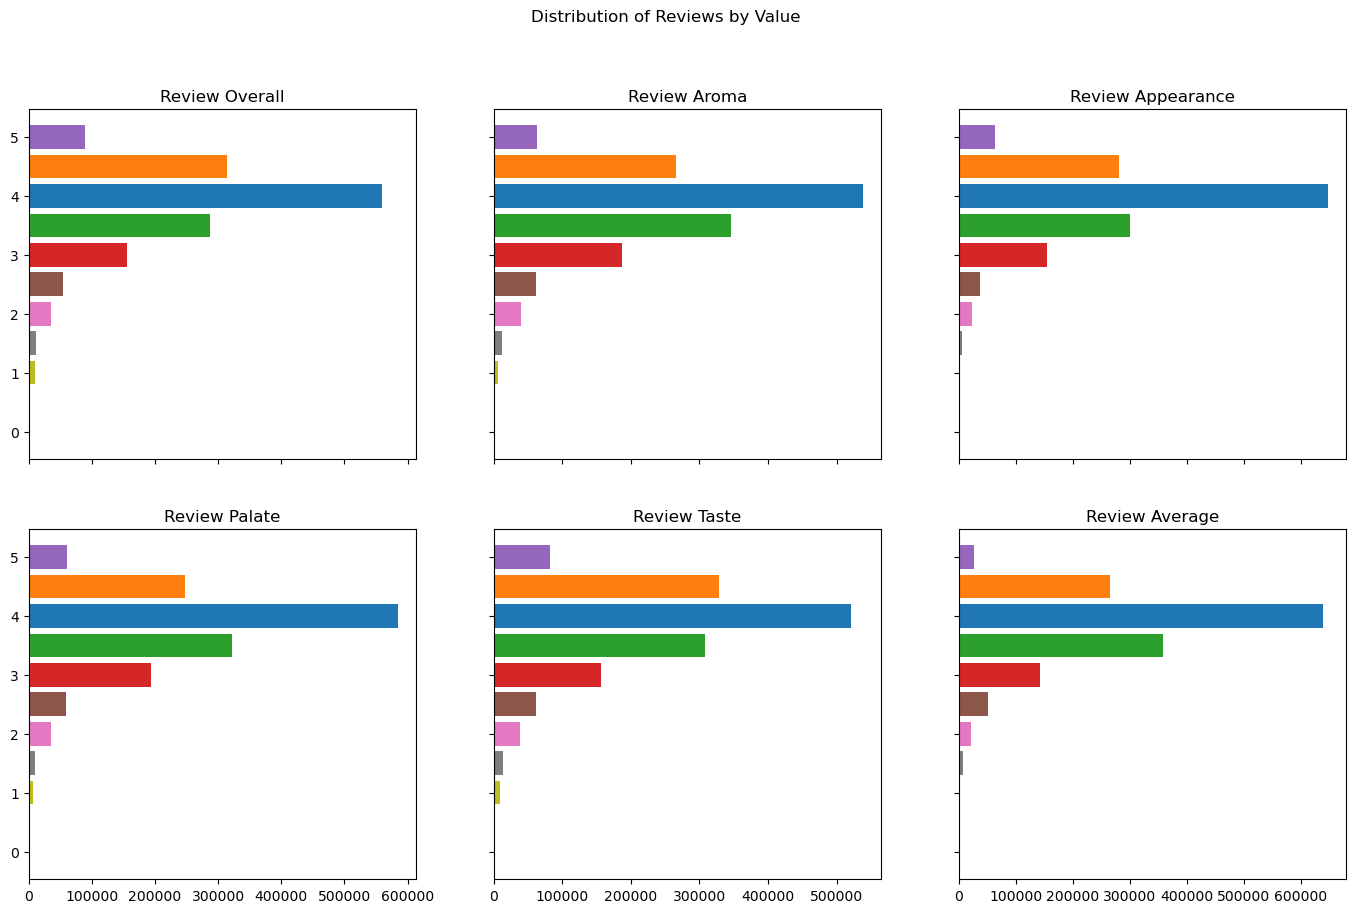

In [6]:
# Calculate the average review
beer_reviews['review_average'] = round(beer_reviews[['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste']].mean(axis=1) * 2) / 2

# Group by different review factors for visualization purposes
review_columns = ['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'review_average']
grouped_dfs = []

for column in review_columns:
    grouped_df = beer_reviews[column].value_counts(dropna=False).reset_index()
    grouped_df.columns = ['review', column]
    grouped_dfs.append(grouped_df)

# Merge all group dataframes
merged_df = grouped_dfs[0]
for df in grouped_dfs[1:]:
    merged_df = pd.merge(merged_df, df, on='review', how='outer')

# Replace NaN with 0 in merged dataframe
merged_df.fillna(0, inplace=True)

# Plotting
cm = plt.cm.get_cmap('tab10').colors
fig, axes = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(17, 10))

bar_height = 0.4

for ax, column in zip(axes.flatten(), review_columns):
    ax.barh(merged_df['review'], merged_df[column], height=bar_height, color=cm)
    ax.set_title(column.replace('_', ' ').title())

fig.suptitle('Distribution of Reviews by Value')
plt.show()

/var/folders/8h/fhd_s_0j6s10qfgzkvd6tc3m0000gn/T/ipykernel_21017/1725689079.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10').colors


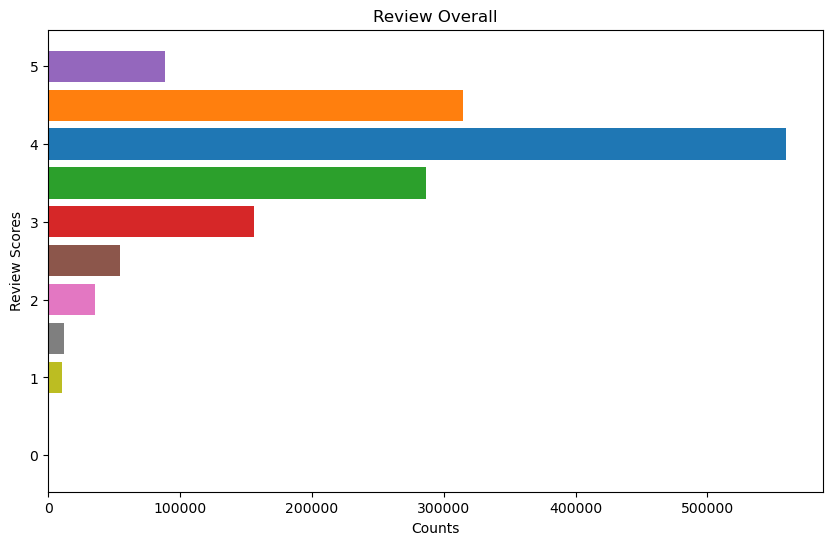

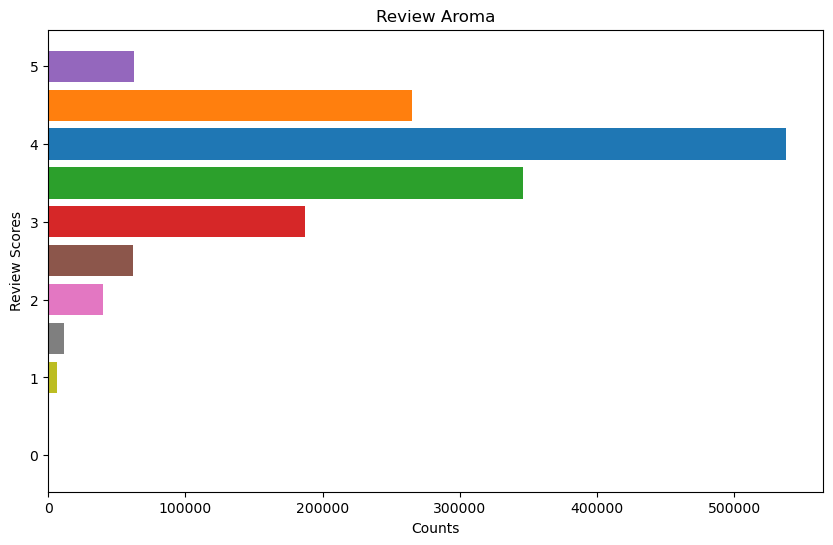

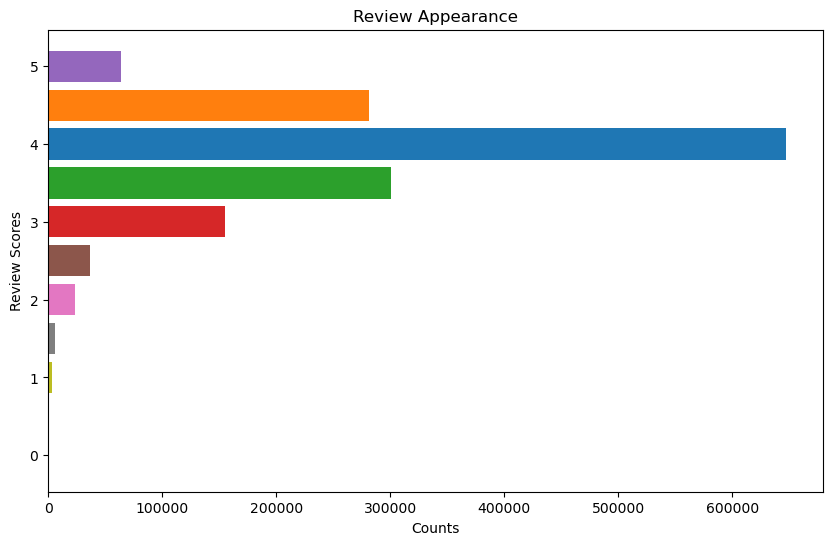

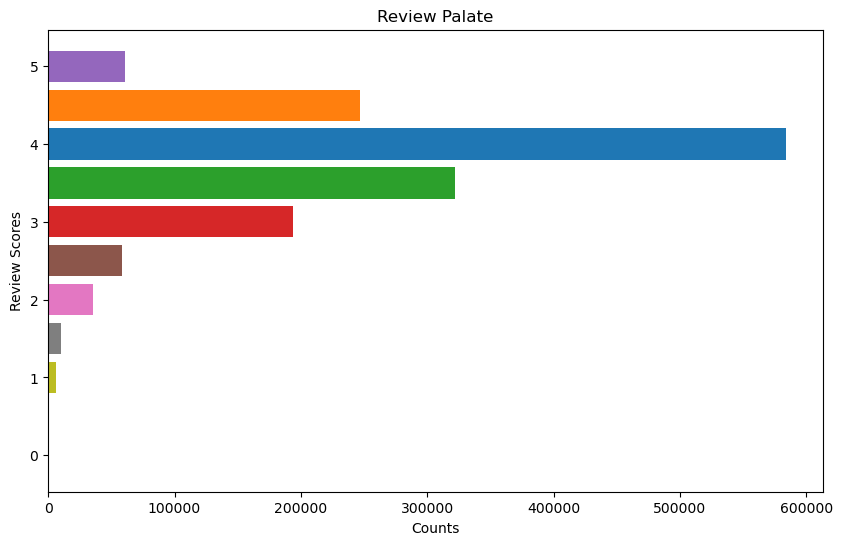

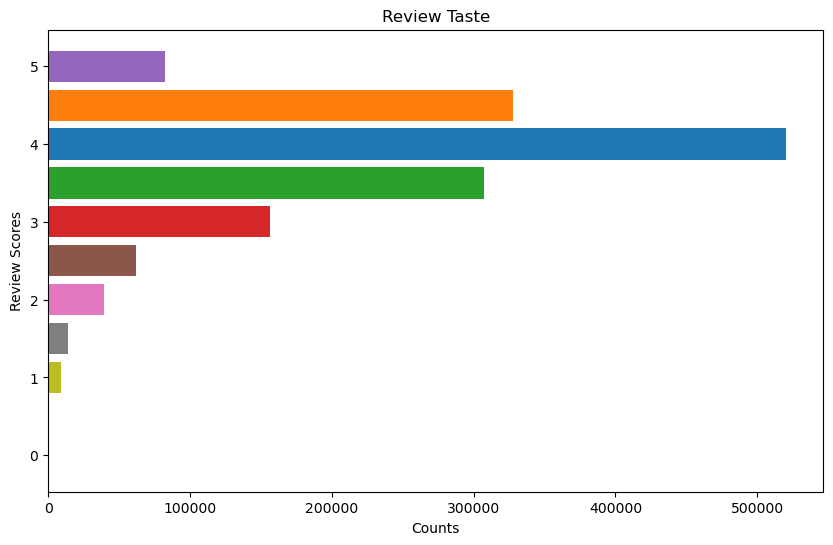

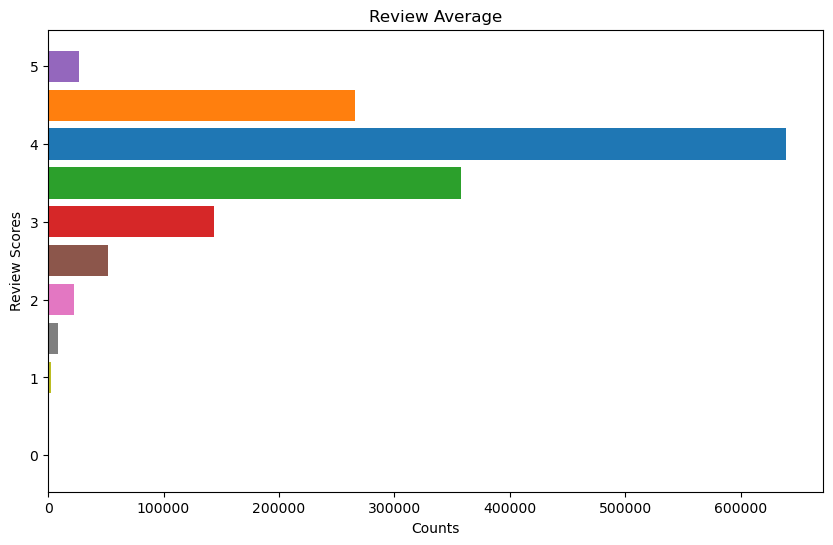

In [7]:
categories = ['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'review_average']
color_map = plt.cm.get_cmap('tab10').colors

# Set the height of the bars
bar_height = 0.4

for category in categories:
    plt.figure(figsize=(10, 6))
    plt.barh(merged_df['review'], merged_df[category], height=bar_height, color=color_map)  # Adjust bar height here
    plt.title(category.replace('_', ' ').title())
    plt.xlabel('Counts')
    plt.ylabel('Review Scores')
    plt.show()

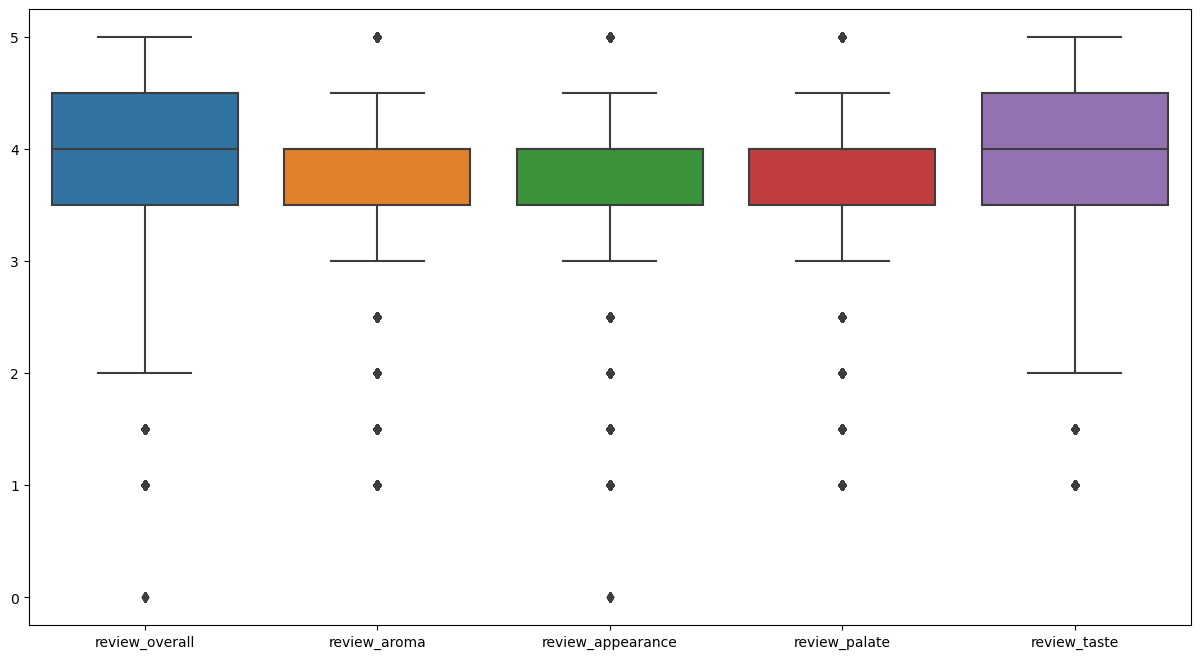

In [8]:
# Outlier Detection 
plt.figure(figsize=(15, 8))
sns.boxplot(data=beer_reviews[['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste']])
plt.show()

In [9]:
# Which Beer is the Best?
top_rated = beer_reviews.groupby(['beer_name', 'beer_style', 'brewery_name']).agg(rating_mean=('review_overall', 'mean'), rating_count=('review_overall', 'count')).loc[lambda x: x['rating_count']>=50].sort_values('rating_mean', ascending=False).reset_index().head(10)
top_rated

,beer_name,beer_style,brewery_name,rating_mean,rating_count
0,Armand'4 Oude Geuze Lente (Spring),Gueuze,Brouwerij Drie Fonteinen,4.730769,65
1,Hoppy Birthday,American Pale Ale (APA),Alpine Beer Company,4.684615,65
2,Geuze Cuvée J&J (Joost En Jessie) Blauw (Blue),Gueuze,Brouwerij Drie Fonteinen,4.633803,71
3,Citra DIPA,American Double / Imperial IPA,Kern River Brewing Company,4.630952,252
4,Cantillon Blåbær Lambik,Lambic - Fruit,Brasserie Cantillon,4.628205,156
5,Veritas 004,American Wild Ale,The Lost Abbey,4.626506,83
6,Heady Topper,American Double / Imperial IPA,The Alchemist,4.625800,469
7,Deviation - Bottleworks 9th Anniversary,American Wild Ale,Russian River Brewing Company,4.620536,112
8,Trappist Westvleteren 12,Quadrupel (Quad),Brouwerij Westvleteren (Sint-Sixtusabdij van W...,4.617925,1272
9,King Henry,English Barleywine,Goose Island Beer Co.,4.617347,98


In [10]:
top_breweries = beer_reviews.groupby('brewery_name').agg(
    rating_mean=('review_overall', 'mean'), 
    rating_count=('review_overall', 'count')
).loc[lambda x: x['rating_count'] >= 50].sort_values('rating_mean', ascending=False).reset_index().head(10)

top_breweries

,brewery_name,rating_mean,rating_count
0,The Alchemist,4.582543,527
1,Brouwerij Westvleteren (Sint-Sixtusabdij van W...,4.544996,2378
2,Russian River Brewing Company,4.374458,11295
3,Närke Kulturbryggeri AB,4.358852,209
4,Badische Staatsbrauerei Rothaus AG,4.357143,126
5,De Cam Geuzestekerij,4.320755,159
6,Live Oak Brewing Company,4.315104,576
7,Hill Farmstead Brewery,4.299407,1518
8,Kern River Brewing Company,4.296235,903
9,Brouwerij Drie Fonteinen,4.291966,1668


/var/folders/8h/fhd_s_0j6s10qfgzkvd6tc3m0000gn/T/ipykernel_21017/750179119.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('tab10').colors


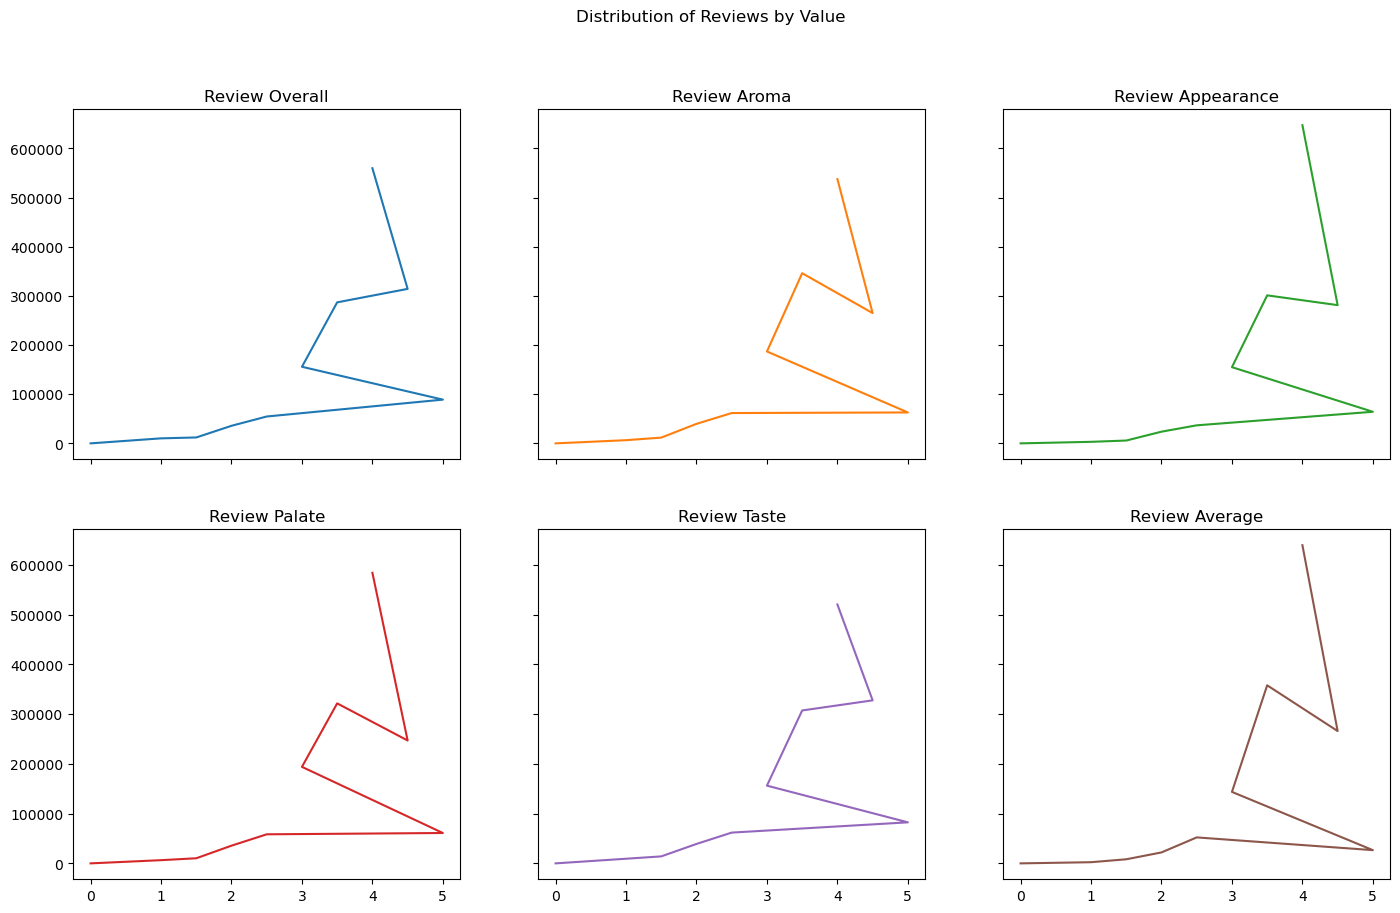

In [11]:
import matplotlib.pyplot as plt

# Your data preparation code remains the same

# Plotting
cm = plt.cm.get_cmap('tab10').colors
fig, axes = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(17, 10))

for i, (ax, column) in enumerate(zip(axes.flatten(), review_columns)):
    color = cm[i % len(cm)]  # Use modulo to cycle through colors if there are more plots than colors
    ax.plot(merged_df['review'], merged_df[column], color=color)
    ax.set_title(column.replace('_', ' ').title())

fig.suptitle('Distribution of Reviews by Value')
plt.show()


In [24]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
model_pre = lgb.LGBMRegressor()

In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
label_encoder = LabelEncoder()
beer_reviews['brewery_name_encoded'] = label_encoder.fit_transform(beer_reviews['brewery_name'])

In [26]:
params = {
    "n_estimators": 1000,
    "learning_rate": 0.1,
    "lambda_l1": 10,
    "lambda_l2": 50,
    "max_depth": 15,
    "subsample": 0.8
}

In [27]:
model = lgb.LGBMRegressor(**params)

In [28]:
x = beer_reviews.drop(["brewery_id", "review_overall", "review_profilename", "brewery_name", 'beer_name', "beer_beerid", "review_average", "beer_style"], axis=1)
y = beer_reviews["review_overall"]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=100)
model.fit(x_train, y_train) 

[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.102361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 974
[LightGBM] [Info] Number of data points in the train set: 1214782, number o

LGBMRegressor(lambda_l1=10, lambda_l2=50, max_depth=15, n_estimators=1000,
              subsample=0.8)

In [30]:
model.score(x_train, y_train)

[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.6998920576734756

In [31]:
model.score(x_test, y_test)

[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.6957822472110997

In [33]:
pred = model.predict(x_test)
gap = abs(pred - y_test)

[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [34]:
gap[:30]

38098      0.165231
1341899    0.049078
1384165    0.257467
267911     0.144863
924357     0.181665
115782     0.281960
68017      0.319200
991245     0.714159
1537274    0.280726
1380288    0.196674
1544740    0.365356
1419701    0.418738
555313     0.324254
97206      0.011937
1257144    0.089142
1223958    0.271799
1389607    0.414464
1333827    0.029996
202774     0.004366
1345779    0.376420
1202954    0.355535
302972     0.746137
590855     0.294083
1122696    0.038439
333496     0.284933
1584591    0.103026
827084     0.052613
755856     0.520826
864630     0.519237
1528318    0.351503
Name: review_overall, dtype: float64

In [36]:
def round_to_nearest_half(number):
    return min(max(0, round(number * 2) / 2), 5)

In [37]:
rounded_pred = np.array([round_to_nearest_half(x) for x in pred])

In [42]:
y_test_ratings = np.array(y_test)
accuracy = np.mean(y_test_ratings == rounded_pred)
accuracy

In [43]:
## using only [appearance, aroma, palate, taste]
x = beer_reviews.drop(["index", "brewery_id", "review_overall", "review_profilename", "brewery_name", 'beer_name', "beer_beerid", "review_average", "beer_style", "beer_abv", "brewery_name_encoded", "review_time"], axis=1)
y = beer_reviews["review_overall"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=100)
model.fit(x_train, y_train)

[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 40
[LightGBM] [Info] Number of data points in the train set: 1214782, number of

LGBMRegressor(lambda_l1=10, lambda_l2=50, max_depth=15, n_estimators=1000,
              subsample=0.8)

In [44]:
model.score(x_train, y_train)

[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.665268840155981

In [45]:
model.score(x_test, y_test)

[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.6657639507085131

In [46]:
pred = model.predict(x_test)
gap = abs(pred - y_test)
gap[:30]

[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


38098      0.178982
1341899    0.061675
1384165    0.322928
267911     0.033503
924357     0.317721
115782     0.101432
68017      0.383866
991245     0.552606
1537274    0.383866
1380288    0.080909
1544740    0.308228
1419701    0.433616
555313     0.177832
97206      0.054060
1257144    0.167189
1223958    0.312562
1389607    0.409679
1333827    0.071574
202774     0.066384
1345779    0.541828
1202954    0.397571
302972     0.981808
590855     0.370704
1122696    0.010331
333496     0.150015
1584591    0.109892
827084     0.066384
755856     0.343065
864630     0.438325
1528318    0.482856
Name: review_overall, dtype: float64

In [47]:
accuracy_11 = np.mean(gap < 0.25)
accuracy_11

0.5113139455244718

In [48]:
accuracy_6 = np.mean(gap < 0.5)
accuracy_6

0.811897423739529

In [49]:
## using [appearance, aroma, palate, taste, abv]
x = beer_reviews.drop(["index", "brewery_id", "review_overall", "review_profilename", "brewery_name", 'beer_name', "beer_beerid", "review_average", "beer_style", "brewery_name_encoded", "review_time"], axis=1)
y = beer_reviews["review_overall"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=100)
model.fit(x_train, y_train)

[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 1214782, number of used features: 5
[LightGBM] [Info] Start training from score 3

LGBMRegressor(lambda_l1=10, lambda_l2=50, max_depth=15, n_estimators=1000,
              subsample=0.8)

In [50]:
model.score(x_train, y_train)

[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.6840974338593553

In [51]:
model.score(x_test, y_test)

[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.6827069871922931

In [52]:
pred = model.predict(x_test)
gap = abs(pred - y_test)
gap[:30]

[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


38098      0.218148
1341899    0.126199
1384165    0.271608
267911     0.159641
924357     0.275255
115782     0.177468
68017      0.302815
991245     0.778894
1537274    0.330557
1380288    0.011104
1544740    0.348223
1419701    0.480731
555313     0.255143
97206      0.008388
1257144    0.116515
1223958    0.252932
1389607    0.456089
1333827    0.009715
202774     0.132212
1345779    0.473181
1202954    0.458503
302972     0.954219
590855     0.433381
1122696    0.089587
333496     0.219507
1584591    0.097175
827084     0.056773
755856     0.485053
864630     0.476092
1528318    0.425989
Name: review_overall, dtype: float64

In [53]:
accuracy_11 = np.mean(gap < 0.25)
accuracy_11

0.5153805120910384

In [54]:
accuracy_6 = np.mean(gap < 0.5)
accuracy_6

0.8195662768031189

In [55]:
## using [appearance, aroma, palate, taste, abv, brewery_name]
x = beer_reviews.drop(["index", "brewery_id", "review_overall", "review_profilename", "brewery_name", 'beer_name', "beer_beerid", "review_average", "beer_style", "review_time"], axis=1)
y = beer_reviews["review_overall"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=100)
model.fit(x_train, y_train)

[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 464
[LightGBM] [Info] Number of data points in the train set: 1214782, number o

LGBMRegressor(lambda_l1=10, lambda_l2=50, max_depth=15, n_estimators=1000,
              subsample=0.8)

In [56]:
model.score(x_train, y_train)

[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.6909699319628446

In [57]:
model.score(x_test, y_test)

[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.6881919273640082

In [58]:
pred = model.predict(x_test)
gap = abs(pred - y_test)
gap[:30]

[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


38098      0.240003
1341899    0.108074
1384165    0.266862
267911     0.141570
924357     0.205765
115782     0.231681
68017      0.337478
991245     0.747244
1537274    0.313742
1380288    0.187431
1544740    0.328580
1419701    0.436060
555313     0.296750
97206      0.009727
1257144    0.122591
1223958    0.280224
1389607    0.409589
1333827    0.015136
202774     0.085734
1345779    0.482253
1202954    0.452407
302972     0.818199
590855     0.426489
1122696    0.094630
333496     0.209997
1584591    0.100021
827084     0.067978
755856     0.519866
864630     0.505296
1528318    0.375152
Name: review_overall, dtype: float64

In [59]:
accuracy_11 = np.mean(gap < 0.25)
accuracy_11

0.5182254623044097

In [60]:
accuracy_6 = np.mean(gap < 0.5)
accuracy_6

0.8218843843843844

In [61]:
## using [appearance, aroma, palate, taste, abv, brewery_name, time]
x = beer_reviews.drop(["index", "brewery_id", "review_overall", "review_profilename", "brewery_name", 'beer_name', "beer_beerid", "review_average", "beer_style"], axis=1)
y = beer_reviews["review_overall"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=100)
model.fit(x_train, y_train)

[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 719
[LightGBM] [Info] Number of data points in the train set: 1214782, number o

LGBMRegressor(lambda_l1=10, lambda_l2=50, max_depth=15, n_estimators=1000,
              subsample=0.8)

In [62]:
model.score(x_train, y_train)

[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.6983939917747948

In [63]:
model.score(x_test, y_test)

[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


0.6945733938231994

In [64]:
pred = model.predict(x_test)
gap = abs(pred - y_test)
gap[:30]

[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


38098      0.215796
1341899    0.097077
1384165    0.241898
267911     0.132896
924357     0.169401
115782     0.235775
68017      0.315117
991245     0.731301
1537274    0.318085
1380288    0.204326
1544740    0.375321
1419701    0.416932
555313     0.346402
97206      0.014318
1257144    0.096857
1223958    0.267377
1389607    0.415747
1333827    0.002788
202774     0.025920
1345779    0.380036
1202954    0.349137
302972     0.742151
590855     0.284896
1122696    0.070245
333496     0.233118
1584591    0.077648
827084     0.056499
755856     0.503602
864630     0.511179
1528318    0.369013
Name: review_overall, dtype: float64

In [65]:
accuracy_11 = np.mean(gap < 0.25)
accuracy_11

0.5272575206785733

In [66]:
accuracy_6 = np.mean(gap < 0.5)
accuracy_6

0.8259838786154575